# This code is for evaluating the GANs' performance 

In [1]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#These gan's are not good enough, they increase performance, but not as much as oversampling, needs rework 

gan_directories = {
    'Test_orig_0.8' : '2022-12-14_12-57-44',
    'Test_orig_0.6' : '2022-12-14_15-04-49',
    'Test_orig_0.4' : '2022-12-14_16-48-34',
    'Test_orig_0.2' : '2022-12-14_18-54-13',
    
    'Test_0_0.8' : '2022-12-15_09-10-08',
    'Test_0_0.6' : '2022-12-15_10-41-13',
    'Test_0_0.4' : '2022-12-15_11-34-52',
    'Test_0_0.2' : '2022-12-15_12-31-45',

    'Test_1_0.8' : '2022-12-15_12-57-15',
    'Test_1_0.6' : '2022-12-15_14-07-49',
    'Test_1_0.4' : '2022-12-15_15-01-39',
    'Test_1_0.2' : '2022-12-15_15-41-37',

    'Test_2_0.8' : '2022-12-15_16-08-24',
    'Test_2_0.6' : '2022-12-15_17-22-46',
    'Test_2_0.4' : '2022-12-15_18-18-53',
    'Test_2_0.2' : '2022-12-15_19-04-53',

    'Test_3_0.8' : '2022-12-15_19-31-00',
    'Test_3_0.6' : '2022-12-15_20-43-34',
    'Test_3_0.4' : '2022-12-15_21-39-35',
    'Test_3_0.2' : '2022-12-15_22-21-06',
     } 

gan_directories_reverse = {}
for key, value in gan_directories.items():
    gan_directories_reverse[value] = key

In [3]:
def load_history_from_file(file):
    with open(file, 'rb') as handle:
        data = pickle.load(handle)
    return data

In [4]:
split = []
ratio = []
loss = []
types = []
for path, dirs, files in os.walk('./GAN_results', topdown=True):
    for x in files:
        if x.lower().startswith('all'):
            tmp = path.split("\\" )[-2]
            case = gan_directories_reverse[tmp]
            case = case.split("_")
            pth = os.path.join(path, x)
            dts = load_history_from_file(pth)

            split.append(case[1])
            ratio.append(float(case[2]))

            lst = [i for i in dts.values()]
            loss.append(lst)
            if 'generator' in x.lower():
                types.append('gen')
            elif 'discriminator' in x.lower():
                types.append('disc')

datas = pd.DataFrame({
    'split' : split,
    'ratio' : ratio,
    'loss' : loss,
    'type':types
})
print(datas)

   split  ratio                                               loss  type
0   orig    0.8  [1.7089556455612183, 3.6677002906799316, 4.973...  disc
1   orig    0.8  [4.707522869110107, 4.446624279022217, 2.23751...   gen
2   orig    0.6  [2.1782352924346924, 2.2294423580169678, 5.260...  disc
3   orig    0.6  [4.584146022796631, 5.894498348236084, 2.65984...   gen
4   orig    0.4  [2.7861456871032715, 0.6022717952728271, 4.215...  disc
5   orig    0.4  [3.834190845489502, 5.689105033874512, 6.92111...   gen
6   orig    0.2  [3.735722303390503, 2.1261825561523438, 1.0261...  disc
7   orig    0.2  [2.79219126701355, 4.79099702835083, 5.9446897...   gen
8      0    0.8  [1.9007595777511597, 3.7840282917022705, 6.007...  disc
9      0    0.8  [4.474331855773926, 4.026212692260742, 2.67396...   gen
10     0    0.6  [2.1634888648986816, 2.6550071239471436, 5.490...  disc
11     0    0.6  [4.572723865509033, 5.55011510848999, 2.785212...   gen
12     0    0.4  [2.7679498195648193, 0.63441777229

In [5]:
def plot_gan_dataframe(dataframe, filters):
    """
        A simple plotting function based on a filtered database
    """
    fig = plt.figure(constrained_layout= True, figsize=(15,9)) 
    
    #fig.suptitle(f"Gan losses during learning", fontsize='xx-large')
    len_split = len(filters['split'])
    len_ratio = len(filters['ratio'])
    subplots = fig.subplots(len_ratio, len_split, sharex = True, sharey = True)

    for row, axes in enumerate(subplots):
        for column, ax in enumerate(axes):
            ratio_num = row #count % len_ratio
            split_num = column #count // len_ratio
            curr_ratio = filters['ratio'][ratio_num]
            curr_split = filters['split'][split_num]
 
            temp_df = dataframe[(dataframe['split']==curr_split) & (dataframe['ratio']==curr_ratio)]
            temp_df = temp_df.filter(items=['loss', 'type'])
            
            for nn, rows in temp_df.iterrows():
                ax.plot(rows[0], label = f"{rows[1]} Loss")
            ax.legend(loc = "upper right", prop = {'size':8})

            if row == 0:
                ax.set_title(f'{curr_split} split')
            if column == 0:
                ax.set_ylabel(f'{curr_ratio} ratio')

In [6]:
def gan_filters(split = 'all', ratio='all'):
    """
        This function filters out the gan by the given parameters and then plots it.
        Prameters:
            split : 'orig', 0, 1, 2, 3 or any tuple of them or 'all'
            ratio : 1, 0.8, 0.6, 0.4, 0.2 or any tuple of them or 'all'
    """
    #TODO check parameters validness
    if split == 'all':
        split = ['orig', '0', '1', '2', '3']                 #5
    if ratio == 'all':
        ratio = [0.8, 0.6, 0.4, 0.2]              #5
    
    params = [split, ratio]
    new_params = []
    for param in params:
        if type(param) not in (list, tuple):
            param = [param]
        new_params.append(param)
    filters = { 'split' :  new_params[0], 'ratio' :  new_params[1]}

    df = datas[(datas['split'].isin(filters['split'])) 
                & (datas['ratio'].isin(filters['ratio']))]
    plot_gan_dataframe(df, filters)

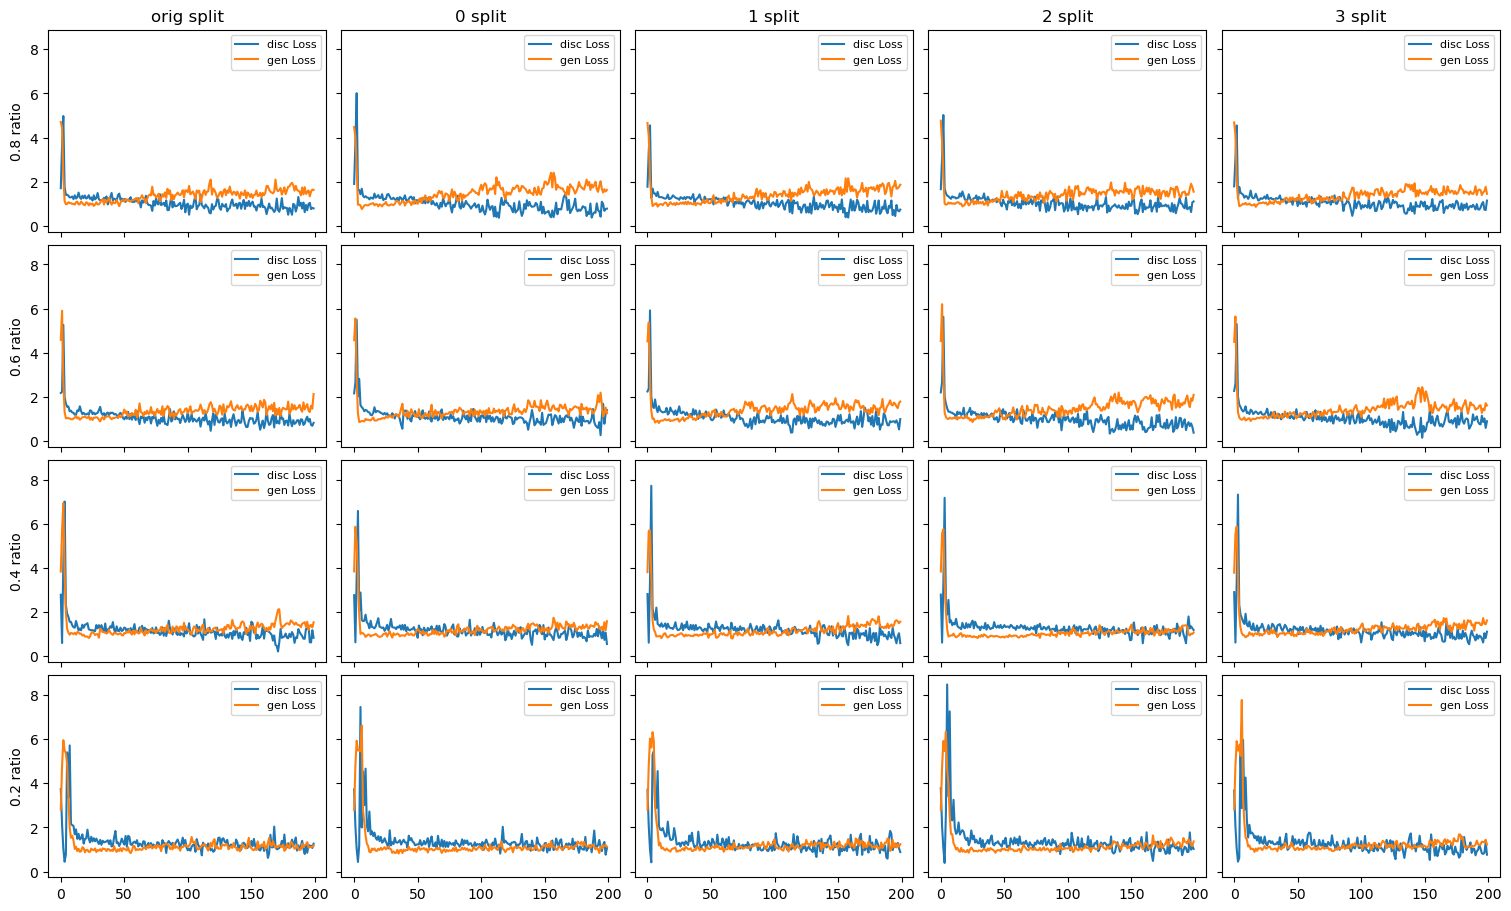

In [7]:
gan_filters()